## Opis

Wykorzystanie regresji liniowej do badania wpływu czynników atmosferycznych na odczuwalną temperaturę.

### Import bibliotek

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

### Import pliku z danymi

In [21]:
data=pd.read_csv("E:/Inne/SDA/SDA_projekt_regresja/weatherhistory.csv", parse_dates=True, index_col='Formatted Date')

### Przegląd danych

In [22]:
data.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00+02:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
2006-04-01 06:00:00+02:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
2006-04-01 07:00:00+02:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
2006-04-01 08:00:00+02:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.


In [23]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Przygotowanie danych

In [24]:
data = data.drop('Loud Cover', axis=1)

In [25]:
data.isnull().any()

Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [26]:
data.isnull().sum(axis = 0)

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


In [28]:
data.value_counts('Precip Type')

Precip Type
rain    85224
snow    10712
dtype: int64

In [29]:
data.dropna(axis=0, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
 9   Daily Summary             95936 non-null  object 
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


In [31]:
data.value_counts('Summary')

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [32]:
data.value_counts('Daily Summary')

Daily Summary
Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Length: 214, dtype: int64

In [33]:
data = data.drop(['Daily Summary', 'Summary'], axis=1)

In [34]:
data.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-04-01 01:00:00+02:00,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 02:00:00+02:00,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 03:00:00+02:00,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 04:00:00+02:00,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [35]:
data_dummies_precip = pd.get_dummies(data['Precip Type'], drop_first=True)
data_dummies_precip

,snow
Formatted Date,
2006-04-01 00:00:00+02:00,0
2006-04-01 01:00:00+02:00,0
2006-04-01 02:00:00+02:00,0
2006-04-01 03:00:00+02:00,0
2006-04-01 04:00:00+02:00,0
...,...
2016-09-09 19:00:00+02:00,0
2016-09-09 20:00:00+02:00,0
2016-09-09 21:00:00+02:00,0


In [36]:
data = pd.concat([data, data_dummies_precip],axis = 'columns')

In [37]:
data = data.drop('Precip Type', axis=1)

In [38]:
data.rename(columns = {'snow':'Snow'}, inplace = True)

In [39]:
data.sample()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow
Formatted Date,,,,,,,,
2007-01-24 16:00:00+01:00,8.75,7.344444,0.72,8.9838,171.0,11.1573,997.42,0


In [40]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038,0.111658
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976,0.314947
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000,0.000000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000,0.000000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000


### Podział danych na zbiór treningowy i testowy

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop('Apparent Temperature (C)', axis=1)
y = data['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train dimension=  (76748, 7)
X_test dimension=  (19188, 7)
y_train dimension=  (76748,)
y_train dimension=  (19188,)


### Badanie korelacji między zmiennymi objaśniającymi

Ordinary Least Squares regression

In [43]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_statsmodels = sm.add_constant(X_train)
print(OLS(y_train, X_train_statsmodels).fit().summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.083e+06
Date:                      Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                              18:47:58   Log-Likelihood:            -1.1430e+05
No. Observations:                     76748   AIC:                         2.286e+05
Df Residuals:                         76740   BIC:                         2.287e+05
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [45]:
X_train.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow
Temperature (C),1.000000,-0.632705,0.009303,0.029612,0.393912,-0.007281,-0.564096
Humidity,-0.632705,1.000000,-0.225839,0.001846,-0.369988,0.005779,0.235206
Wind Speed (km/h),0.009303,-0.225839,1.000000,0.104691,0.101231,-0.050300,-0.069584
Wind Bearing (degrees),0.029612,0.001846,0.104691,1.000000,0.048801,-0.012878,-0.040680
Visibility (km),0.393912,-0.369988,0.101231,0.048801,1.000000,0.060571,-0.318544
Pressure (millibars),-0.007281,0.005779,-0.050300,-0.012878,0.060571,1.000000,0.011992
Snow,-0.564096,0.235206,-0.069584,-0.040680,-0.318544,0.011992,1.000000


In [46]:
X_train.join(y_train).corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow,Apparent Temperature (C)
Temperature (C),1.000000,-0.632705,0.009303,0.029612,0.393912,-0.007281,-0.564096,0.992630
Humidity,-0.632705,1.000000,-0.225839,0.001846,-0.369988,0.005779,0.235206,-0.602848
Wind Speed (km/h),0.009303,-0.225839,1.000000,0.104691,0.101231,-0.050300,-0.069584,-0.056545
Wind Bearing (degrees),0.029612,0.001846,0.104691,1.000000,0.048801,-0.012878,-0.040680,0.028277
Visibility (km),0.393912,-0.369988,0.101231,0.048801,1.000000,0.060571,-0.318544,0.382665
Pressure (millibars),-0.007281,0.005779,-0.050300,-0.012878,0.060571,1.000000,0.011992,-0.001839
Snow,-0.564096,0.235206,-0.069584,-0.040680,-0.318544,0.011992,1.000000,-0.566331
Apparent Temperature (C),0.992630,-0.602848,-0.056545,0.028277,0.382665,-0.001839,-0.566331,1.000000


<AxesSubplot:>

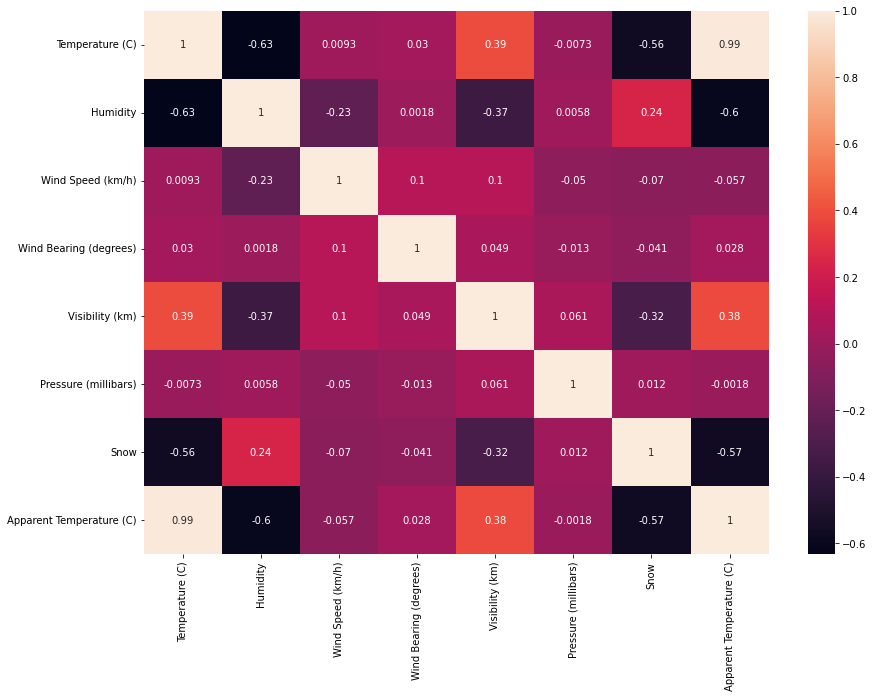

In [47]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

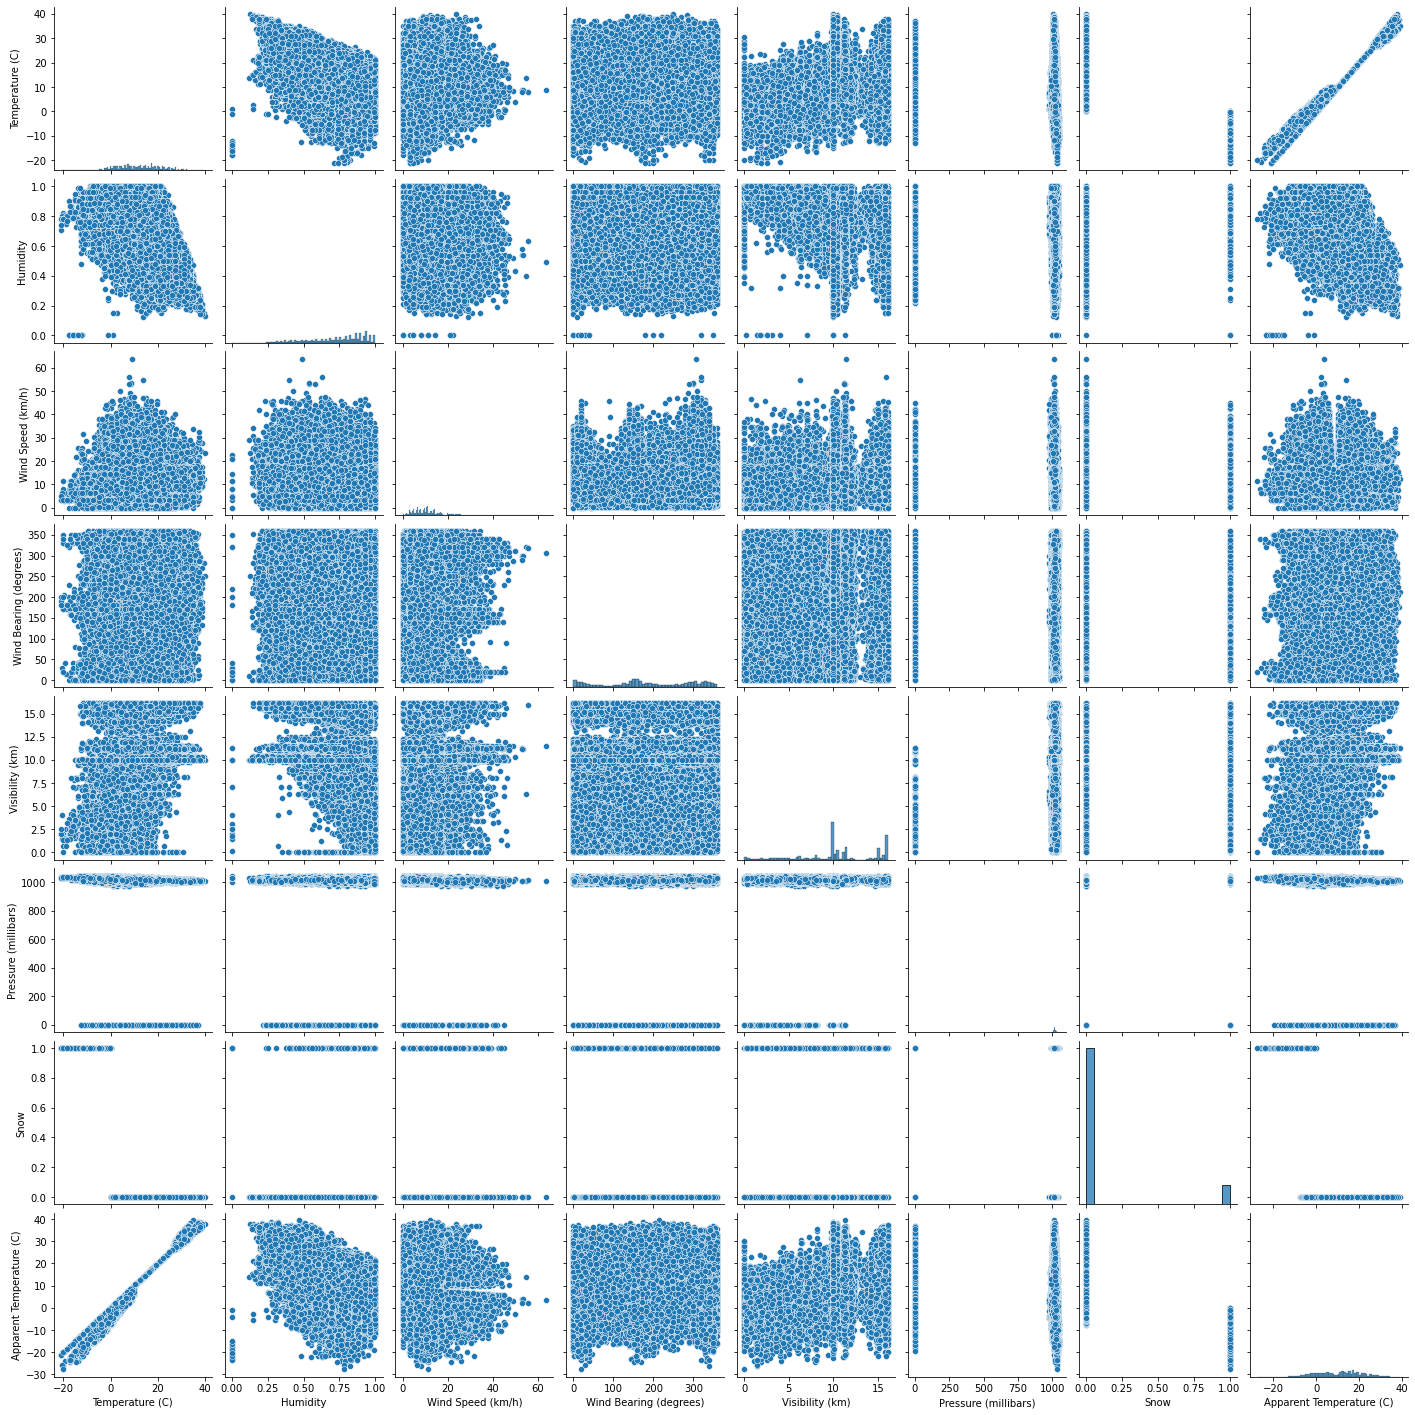

In [48]:
sns.pairplot(X_train.join(y_train), kind="scatter")

### Budowanie modelu

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Współczynnik regresji: {lin_reg.coef_}")
print(f"Wyraz wolny: {lin_reg.intercept_}")

Współczynnik regresji: [ 1.11558250e+00  8.52590949e-01 -9.81648303e-02  4.98012272e-04
 -5.62588477e-03  2.26621105e-04 -4.32628870e-01]
Wyraz wolny: -2.238572214735669


In [50]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

Wyniki regresji liniowej na zbiorze treningowym:

In [52]:
regression_results(y_train, y_train_pred)

r2:  0.99
MAE:  0.8438
MSE:  1.1511
RMSE:  1.0729


Wyniki regresji liniowej na zbiorze testowym:

In [96]:
regression_results(y_test, y_test_pred)

r2:  0.99
MAE:  0.8436
MSE:  1.1495
RMSE:  1.0721


E:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test dla normalości reszt (residuals): \n Residual eror')

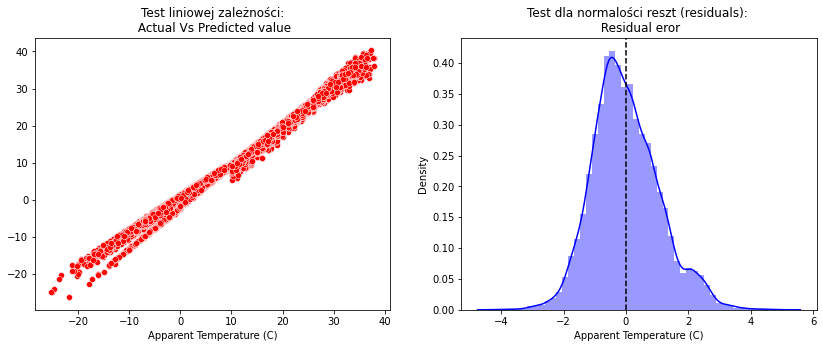

In [53]:
# Test liniowej zależności
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_test_pred, ax=ax, color="r")
ax.set_title("Test liniowej zależności:\n Actual Vs Predicted value")

# Test dla normalności reszt
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred), ax=ax, color="b")
ax.axvline((y_test - y_test_pred).mean(), color="k", linestyle="--")
ax.set_title("Test dla normalości reszt (residuals): \n Residual eror")

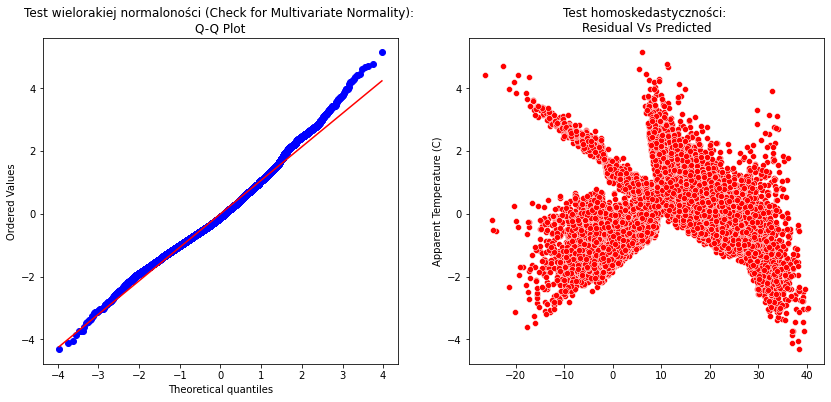

In [54]:
# Test wielorakiej normaloności
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

#Test homoskedastyczności
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Test homoskedastyczności: \nResidual Vs Predicted');

Wykorzystanie kroswalidacji

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
lm.fit(X_train, y_train)
folds = KFold(n_splits=15, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_train, y_train, cv=folds, scoring="neg_mean_squared_error")
scores

array([-1.15219704, -1.16588766, -1.14953933, -1.1872294 , -1.10928463,
       -1.15136144, -1.15563407, -1.11630173, -1.16574336, -1.13040556,
       -1.17505567, -1.13157643, -1.16513606, -1.17178464, -1.14415495])

In [56]:
np.abs(scores.mean())

1.1514194647334106

E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

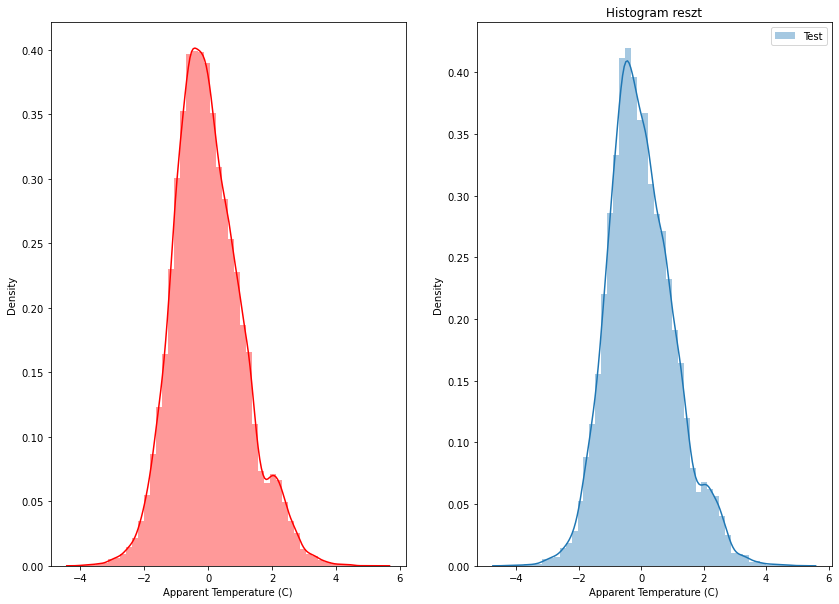

In [57]:
f, axes = plt.subplots(1, 2)
sns.distplot((y_train-y_train_pred), color='red', ax=axes[0], label='Training')
sns.distplot((y_test-y_test_pred), ax=axes[1], label='Test')
plt.legend()
plt.title("Histogram reszt")

### Odrzucenie danych o temperaturze i zbudowanie modelu

In [146]:
X2 = data.drop(['Temperature (C)', 'Apparent Temperature (C)'], axis=1)
y2 = data['Apparent Temperature (C)']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state=42)
print('X2_train dimension= ', X2_train.shape)
print('X2_test dimension= ', X2_test.shape)
print('y2_train dimension= ', y2_train.shape)
print('y2_train dimension= ', y2_test.shape)

X2_train.reset_index(inplace=True, drop=True)
X2_test.reset_index(inplace=True, drop=True)
y2_train.reset_index(inplace=True, drop=True)
y2_test.reset_index(inplace=True, drop=True)

X2_train dimension=  (76748, 6)
X2_test dimension=  (19188, 6)
y2_train dimension=  (76748,)
y2_train dimension=  (19188,)


<AxesSubplot:>

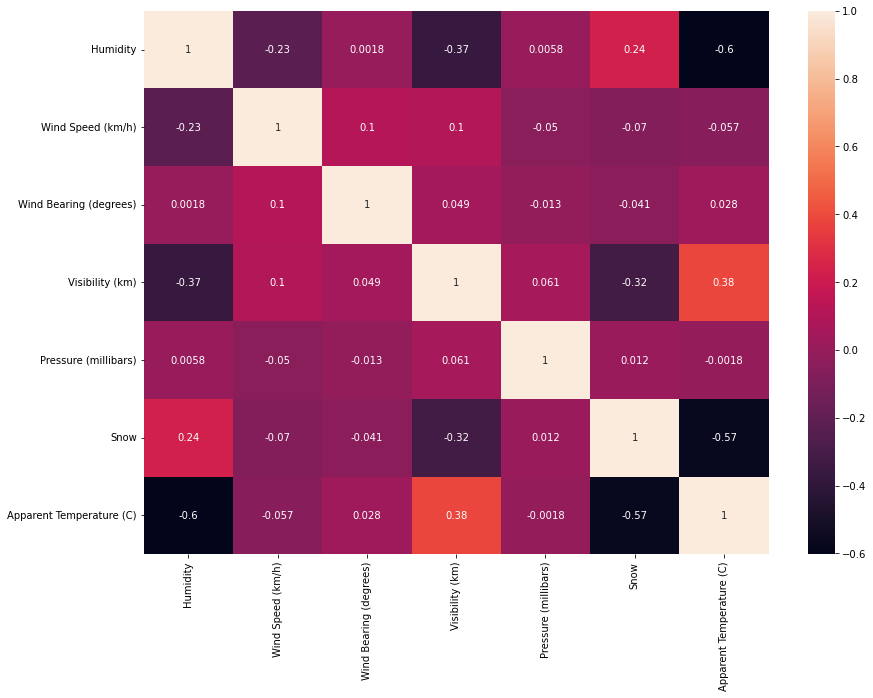

In [148]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X2_train.join(y2_train).corr(), annot=True)

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_train, y2_train)
print(f"Współczynnik regresji: {lin_reg_2.coef_}")
print(f"Wyraz wolny: {lin_reg_2.intercept_}")

Współczynnik regresji: [-2.86355145e+01 -3.34230876e-01  3.04928120e-03  1.84106396e-01
 -7.65625002e-04 -1.47427987e+01]
Wyraz wolny: 35.47145716590342


In [150]:
def regression_results(y_true, y_pred):
    # Regression metrics
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y2_train_pred = lin_reg_2.predict(X2_train)
y2_test_pred = lin_reg_2.predict(X2_test)

In [151]:
regression_results(y2_train, y2_train_pred)

r2:  0.6016
MAE:  5.5385
MSE:  45.7704
RMSE:  6.7654


In [152]:
regression_results(y2_test, y2_test_pred)

r2:  0.6027
MAE:  5.5095
MSE:  45.5934
RMSE:  6.7523


E:\Programy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test dla normalości reszt (residuals): \n Residual eror')

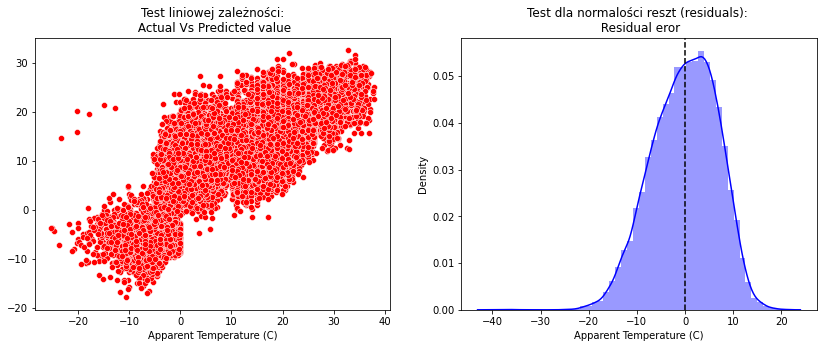

In [153]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y2_test, y2_test_pred, ax=ax, color="r")
ax.set_title("Test liniowej zależności:\n Actual Vs Predicted value")

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y2_test - y2_test_pred), ax=ax, color="b")
ax.axvline((y2_test - y2_test_pred).mean(), color="k", linestyle="--")
ax.set_title("Test dla normalości reszt (residuals): \n Residual eror")

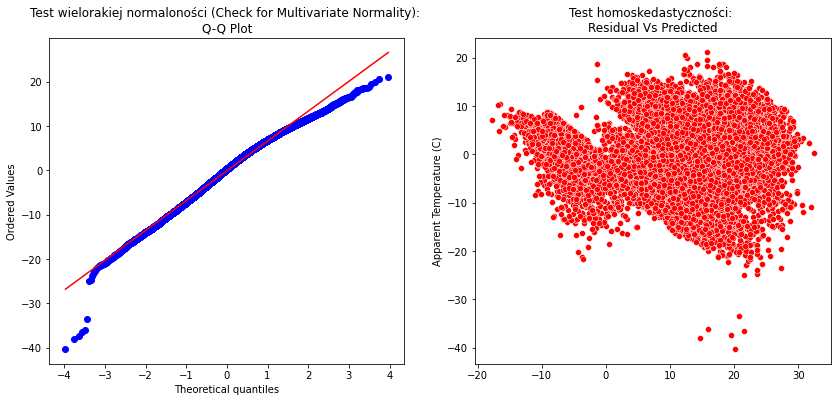

In [154]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y2_test - y2_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y2_test - y2_test_pred), x= y2_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Test homoskedastyczności: \nResidual Vs Predicted');

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
lm.fit(X2, y2)
folds = KFold(n_splits=20, shuffle=True, random_state=42)
scores2 = cross_val_score(lm, X2, y2, cv=folds, scoring="neg_root_mean_squared_error")
scores2

array([-6.80886083, -6.75494007, -6.78893048, -6.65515846, -6.78644162,
       -6.70648166, -6.83907437, -6.83487749, -6.71992513, -6.7035479 ,
       -6.82089684, -6.86436715, -6.71264117, -6.78266896, -6.7106388 ,
       -6.7521327 , -6.86215862, -6.68631584, -6.75919919, -6.70856123])

In [159]:
np.abs(scores2.mean())

6.762890925234656

E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Programy\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram reszt')

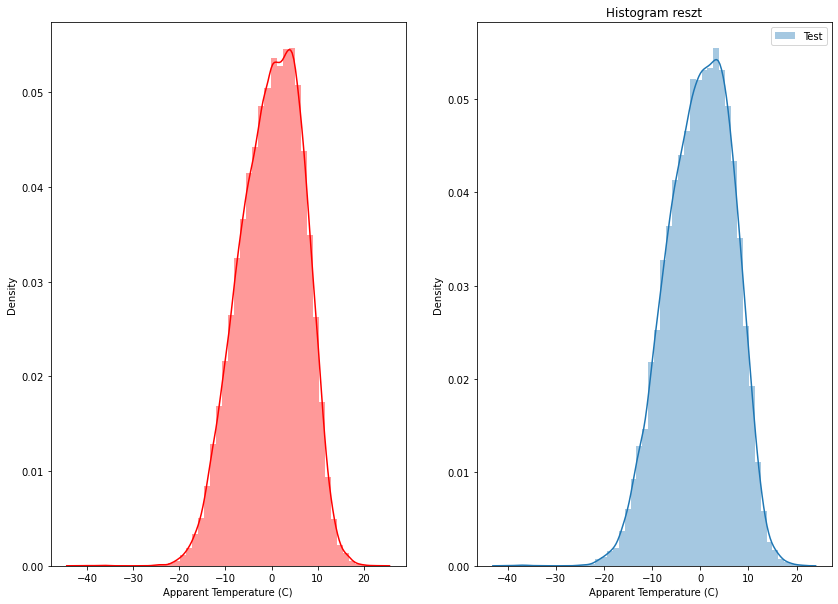

In [174]:
f, axes = plt.subplots(1, 2)
sns.distplot((y2_train-y2_train_pred), color='red', ax=axes[0], label='Training')
sns.distplot((y2_test-y2_test_pred), ax=axes[1], label='Test')
plt.legend()
plt.title("Histogram reszt")

### Badanie wpływu wyeliminowania mało skorelowanych zmiennych objaśniających na wyniki regresji liniowej

In [185]:
data.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Snow'],
      dtype='object')

In [273]:
X3 = data.drop(['Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'], axis=1)
y3 = data['Apparent Temperature (C)']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size = 0.2, random_state=42)

X3_train.reset_index(inplace=True, drop=True)
X3_test.reset_index(inplace=True, drop=True)
y3_train.reset_index(inplace=True, drop=True)
y3_test.reset_index(inplace=True, drop=True)

<AxesSubplot:>

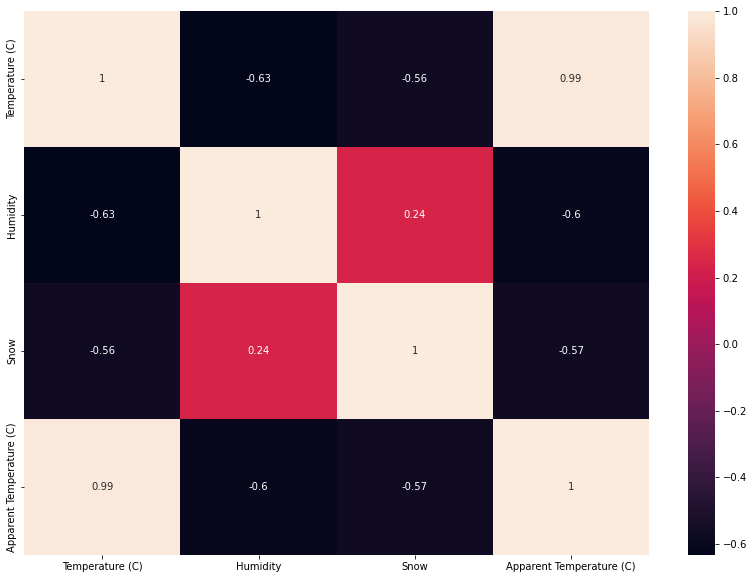

In [278]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X3_train.join(y3_train).corr(), annot=True)

In [274]:
from sklearn.linear_model import LinearRegression

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X3_train, y3_train)
print(f"Współczynnik regresji: {lin_reg_3.coef_}")
print(f"Wyraz wolny: {lin_reg_3.intercept_}")

Współczynnik regresji: [ 1.13936307  2.27900908 -0.06616599]
Wyraz wolny: -4.408963384941602


In [275]:
y3_train_pred = lin_reg_3.predict(X3_train)
y3_test_pred = lin_reg_3.predict(X3_test)

In [276]:
regression_results(y3_train, y3_train_pred)

r2:  0.9864
MAE:  0.9439
MSE:  1.5655
RMSE:  1.2512


In [277]:
regression_results(y3_test, y3_test_pred)

r2:  0.9864
MAE:  0.9448
MSE:  1.5598
RMSE:  1.2489
